# **Taller de Python**
## Profesor: Juan S. Moreno y Julian E. Chitiva B.
# Clase 13: Econometría

- <a href="https://docs.scipy.org/doc/scipy/reference/index.html">Scipy</a> - <a href="https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats">Stats</a>: Distribuciones y pruebas estadísticas
- <a href="https://pypi.org/project/statsmodels/">Statmodels</a>
- <a href="https://scikit-learn.org/stable/"> Scikit-Learn</a>
    - OLS.
    - Modelos discretos (Logit, Probit).
    - Uso de formulas para especificar modelos

**Scipy - <a href="https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats">Estadísticas</a>**
SciPy es una colección de algoritmos matemáticos y funciones de conveniencia construidas en la extensión NumPy de Python. Proporciona muchas rutinas numéricas fáciles de usar y eficientes, como rutinas para integración numérica, interpolación, optimización, álgebra lineal y estadísticas.

**Statsmodels**
Es un módulo de Python que proporciona clases y funciones para la estimación de muchos modelos estadísticos diferentes, así como para realizar pruebas estadísticas y exploración de datos estadísticos. Se encuentra disponible una extensa lista de estadísticas de resultados para cada estimador. Los resultados se prueban con los paquetes estadísticos existentes para garantizar que sean correctos. 

**<a href="https://bashtage.github.io/linearmodels/">Linearmodels</a>**
Es una libreria que extiende la funcionalidad de Statsmodels

**Scikit-Learn**
Scikit-learn es una libreria para Machine Learning que soporta modelos supervisados y no supervidados. Provee herramientas para ajustar modelos y preprocesar datos, entre otros.

## Paquetes necesarios

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import patsy
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model

# Distribuciones y Estadística

1. Construya una distribución Normal con media 10 y desviacion 5

In [2]:
xNorm = stats.norm(loc=10, scale= 5)

2. Pinte las distribuciones acumuladas de la distribución Normal

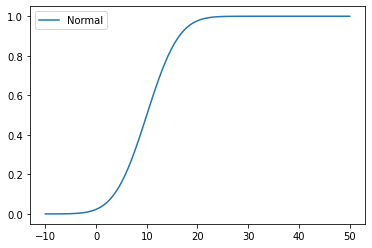

In [3]:
x = np.linspace(-10,50,100)
plt.plot(x, xNorm.cdf(x), label='Normal')
plt.legend();

3. Genere una muestra aleatoria de tamaño 1000 de estas distribución y pinte el histogramas de esta muestra.

In [4]:
n=1000

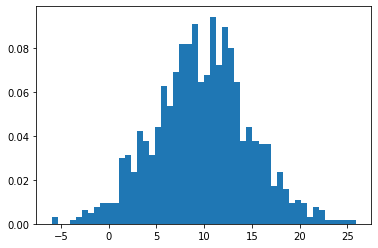

In [5]:
mNorm = xNorm.rvs(size=n)
plt.hist(mNorm,bins=50,density=True);

4. Saque las estadísticas descriptivas de esta distribución

In [6]:
stats.describe(mNorm)

DescribeResult(nobs=1000, minmax=(-5.969852179668202, 25.901324352969677), mean=9.787186915501742, variance=24.78698683737574, skewness=0.01411017425213193, kurtosis=0.05128217890653097)

5. Realice una prueba $t$ sobre la media de la muestra normal que generó anteriormente 

In [7]:
# Prueba t
stats.ttest_1samp(mNorm, 10)

Ttest_1sampResult(statistic=-1.351719124398553, pvalue=0.17677115513541028)

# Regresión Lineal OLS

1. Cargue la base ccard del `sm.datasets`. Explore la descripción y la nota.

In [8]:
print(sm.datasets.ccard.NOTE)
print(sm.datasets.ccard.DESCRLONG)
datos = sm.datasets.ccard.load_pandas().data

::

    Number of observations - 72
    Number of variables - 5
    Variable name definitions - See Source for more information on the
                                variables.

More information on this data can be found on the
homepage for Greene's `Econometric Analysis`. See source.



- Age = Age in years+ 12ths of a year,
- Income = Income, divided by 10,000.
- Avgexp = Avg. monthly credit card expenditure.
- Ownrent = OwnRent, individual owns (1) or rents (0) home.

In [9]:
datos

,AVGEXP,AGE,INCOME,INCOMESQ,OWNRENT
0,124.98,38.0,4.52,20.4304,1.0
1,9.85,33.0,2.42,5.8564,0.0
2,15.00,34.0,4.50,20.2500,1.0
3,137.87,31.0,2.54,6.4516,0.0
4,546.50,32.0,9.79,95.8441,1.0
...,...,...,...,...,...
67,68.38,43.0,2.40,5.7600,0.0
68,474.15,33.0,6.00,36.0000,1.0
69,234.05,25.0,3.60,12.9600,0.0
70,451.20,26.0,5.00,25.0000,1.0


2. Realice una Regresión Lineal Sencilla de el Gasto promedio como función del ingreso. Use Statsmodels

In [10]:
formula = 'AVGEXP ~ INCOME'
y,X = patsy.dmatrices(formula, datos, return_type='matrix')
modelo = sm.OLS(y,X)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                 AVGEXP   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     17.10
Date:                Sat, 01 May 2021   Prob (F-statistic):           9.69e-05
Time:                        20:15:21   Log-Likelihood:                -508.67
No. Observations:                  72   AIC:                             1021.
Df Residuals:                      70   BIC:                             1026.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.5093     76.781     -0.293      0.7

3. Realice una grafica que muestre la relación entre estas variables y los resultados de su modelo OLS

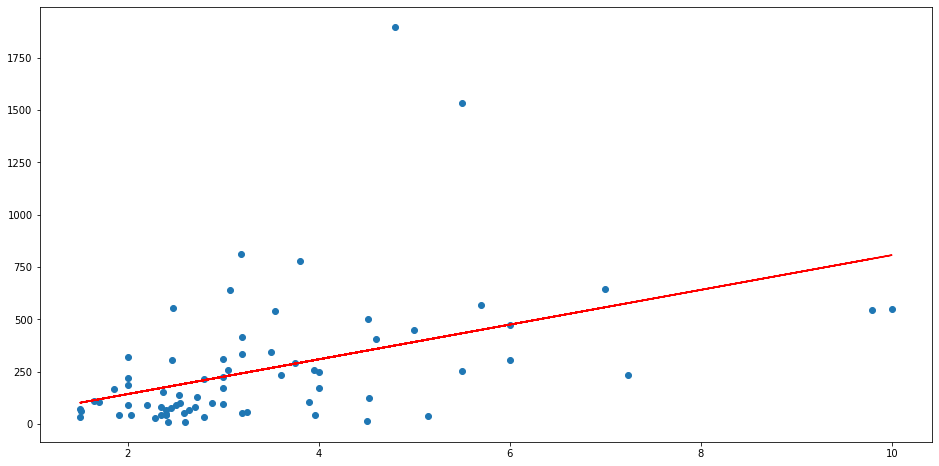

In [11]:
plt.figure(figsize=(16,8))
plt.scatter(X[:,1],y)
plt.plot(X[:,1], resultado.predict(X), c='r')
plt.show()

4. Realice una Regresión Lineal Múltiple de el Gasto promedio como función del ingreso, ingreso al cuadrado y la edad. Use ScikitLearn

In [12]:
formula = 'AVGEXP ~ INCOME + INCOMESQ + AGE'
y, X = patsy.dmatrices(formula, datos)

In [13]:
modelo = linear_model.LinearRegression()
modelo.fit(X,y)
print(modelo.coef_)
print(modelo.intercept_)

[[  0.         237.8550073  -15.05953     -2.51926468]]
[-255.4021149]


# Modelos Discretos - Logit y Probit

1. Parta la variable AVGEXP en 3 categorías de gasto: BAJO (25 % más bajo), MEDIO, ALTO (25% más alto)

In [14]:
datos['NIVEL_GASTO'] = pd.cut(datos.AVGEXP,
                              bins=[0,
                                    datos.AVGEXP.quantile(0.25),
                                    datos.AVGEXP.quantile(0.75),
                                    datos.AVGEXP.max()],
                              labels=['BAJO', 'MEDIO', 'ALTO'])

2. Queremos estimar la probabilidad de que una persona sea dueña de su casa con base en su categoría de gasto, edad, ingreso e ingreso al cuadrado. Use un modelo logit de statsmodels 

In [15]:
datos.columns

Index(['AVGEXP', 'AGE', 'INCOME', 'INCOMESQ', 'OWNRENT', 'NIVEL_GASTO'], dtype='object')

In [16]:
formula = 'OWNRENT ~ NIVEL_GASTO + AGE + INCOME + INCOMESQ'
y,X = patsy.dmatrices(formula, datos)

In [17]:
modelo_logit = sm.Logit(y, X)
resultado_logit = modelo_logit.fit()
print(resultado_logit.summary())

Optimization terminated successfully.
         Current function value: 0.472123
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                OWNRENT   No. Observations:                   72
Model:                          Logit   Df Residuals:                       66
Method:                           MLE   Df Model:                            5
Date:                Sat, 01 May 2021   Pseudo R-squ.:                  0.2864
Time:                        20:15:21   Log-Likelihood:                -33.993
converged:                       True   LL-Null:                       -47.633
Covariance Type:            nonrobust   LLR p-value:                 5.032e-05
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -3.8904      2.739     -1.420      0.155      -9.258       1.478

3. Repita el ejercicio anterior pero use un modelo probit de statsmodels 

In [18]:
modelo_probit = sm.Probit(y, X)
resultado_probit = modelo_probit.fit()
print(resultado_probit.summary())

Optimization terminated successfully.
         Current function value: 0.469866
         Iterations 8
                          Probit Regression Results                           
Dep. Variable:                OWNRENT   No. Observations:                   72
Model:                         Probit   Df Residuals:                       66
Method:                           MLE   Df Model:                            5
Date:                Sat, 01 May 2021   Pseudo R-squ.:                  0.2898
Time:                        20:15:22   Log-Likelihood:                -33.830
converged:                       True   LL-Null:                       -47.633
Covariance Type:            nonrobust   LLR p-value:                 4.349e-05
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.4751      1.583     -1.563      0.118      -5.578       0.628

4. Calcule los efectos marginales de cada modelo

In [19]:
print(resultado_logit.get_margeff().summary())

        Logit Marginal Effects       
Dep. Variable:                OWNRENT
Method:                          dydx
At:                           overall
                          dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
NIVEL_GASTO[T.MEDIO]    -0.0073      0.114     -0.064      0.949      -0.230       0.215
NIVEL_GASTO[T.ALTO]      0.1709      0.139      1.229      0.219      -0.102       0.444
AGE                      0.0186      0.006      2.911      0.004       0.006       0.031
INCOME                  -0.1378      0.223     -0.617      0.537      -0.575       0.300
INCOMESQ                 0.0261      0.029      0.915      0.360      -0.030       0.082


In [20]:
print(resultado_probit.get_margeff().summary())

       Probit Marginal Effects       
Dep. Variable:                OWNRENT
Method:                          dydx
At:                           overall
                          dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
NIVEL_GASTO[T.MEDIO]     0.0024      0.114      0.021      0.983      -0.221       0.226
NIVEL_GASTO[T.ALTO]      0.1956      0.141      1.389      0.165      -0.080       0.472
AGE                      0.0197      0.007      3.028      0.002       0.007       0.032
INCOME                  -0.1326      0.215     -0.616      0.538      -0.555       0.290
INCOMESQ                 0.0250      0.027      0.927      0.354      -0.028       0.078


5. Suponga que si la probabilidad es mayor a 0.5, el individuo es dueño. ¿Qué tan bien está prediciendo su modelo?

In [21]:
resultado_logit.pred_table()

array([[39.,  6.],
       [10., 17.]])

In [22]:
resultado_probit.pred_table()

array([[39.,  6.],
       [10., 17.]])